# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Connecting to database

In [17]:
engine = create_engine("sqlite:///../database/vayu.db")

# Collecting Data

In [19]:
query = """ Select w.temperature, w.humidity, w.wind_speed, w.precipitation, w.comfort_score, u.temp_min, u.temp_max, u.humidity_tolerance,
            u.wind_tolerance, u.rain_preference, u.activity_level
            from weather_logs w join users u on w.user_id = u.id 
            where w.comfort_score is NOT NULL ; """

df = pd.read_sql(query, engine)
print(df.head())

   temperature  humidity  wind_speed  precipitation  comfort_score  temp_min  \
0         29.4      86.5         1.7            0.0             75        18   
1         29.4      86.5         1.7            0.0             75        18   

   temp_max humidity_tolerance wind_tolerance rain_preference activity_level  
0        26             medium         medium         neutral         medium  
1        26             medium         medium         neutral         medium  


# Insights from the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         2 non-null      float64
 1   humidity            2 non-null      float64
 2   wind_speed          2 non-null      float64
 3   precipitation       2 non-null      float64
 4   comfort_score       2 non-null      int64  
 5   temp_min            2 non-null      int64  
 6   temp_max            2 non-null      int64  
 7   humidity_tolerance  2 non-null      object 
 8   wind_tolerance      2 non-null      object 
 9   rain_preference     2 non-null      object 
 10  activity_level      2 non-null      object 
dtypes: float64(4), int64(3), object(4)
memory usage: 308.0+ bytes


In [21]:
df.describe()

,temperature,humidity,wind_speed,precipitation,comfort_score,temp_min,temp_max
count,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,29.4,86.5,1.7,0.0,75.0,18.0,26.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,29.4,86.5,1.7,0.0,75.0,18.0,26.0
25%,29.4,86.5,1.7,0.0,75.0,18.0,26.0
50%,29.4,86.5,1.7,0.0,75.0,18.0,26.0
75%,29.4,86.5,1.7,0.0,75.0,18.0,26.0
max,29.4,86.5,1.7,0.0,75.0,18.0,26.0


In [22]:
df.isnull().sum()

temperature           0
humidity              0
wind_speed            0
precipitation         0
comfort_score         0
temp_min              0
temp_max              0
humidity_tolerance    0
wind_tolerance        0
rain_preference       0
activity_level        0
dtype: int64

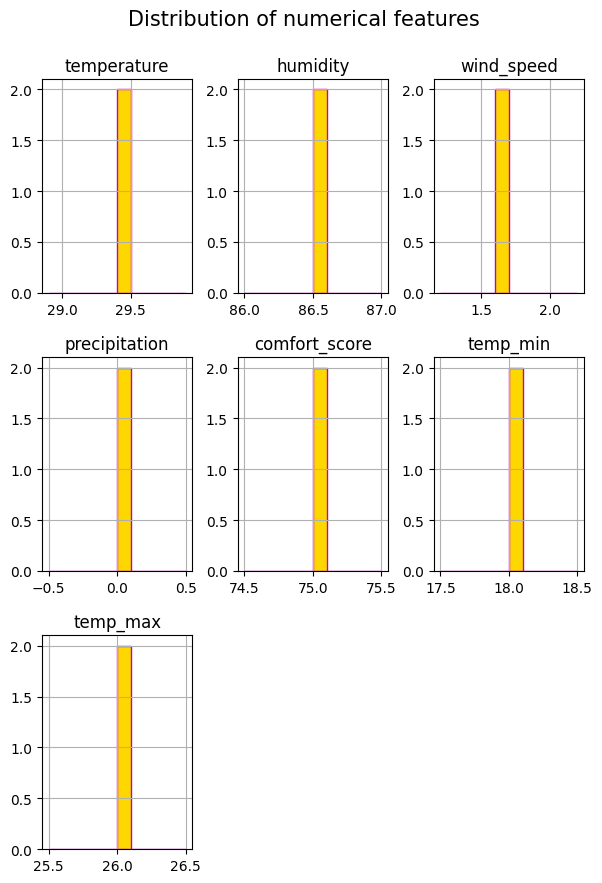

In [23]:
df.hist(figsize = (7,10), bins = 10, color = 'gold', edgecolor = 'm' )
plt.suptitle("Distribution of numerical features", fontsize = 15, y = 0.95)
plt.show()

# Selecting Dependent and Independent variable

In [24]:
df.columns = df.columns.str.strip()

x = df.drop("comfort_score", axis = 1)           # Dependent features
y = df["comfort_score"]                          # Target feature

# Preprocessing

In [25]:
numeric = x.columns[0:6].tolist()
categorical = x.columns[6:].tolist()

In [26]:
print(categorical)
print(numeric)

['humidity_tolerance', 'wind_tolerance', 'rain_preference', 'activity_level']
['temperature', 'humidity', 'wind_speed', 'precipitation', 'temp_min', 'temp_max']


In [27]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric),
    ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical)
])

# Creating pipeline

In [28]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators = 200, random_state = 42))
])

# Model training

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Prediction

In [30]:
y_pred = model.predict(x_test)
print(y_pred)

[75.]


# Evaluating the model

In [31]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score = ", r2)
print("Mean Squared Error = ", mse)

R2 Score =  nan
Mean Squared Error =  0.0


c:\Users\window\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [33]:
joblib.dump(model, "ml_model.pkl")

['ml_model.pkl']